## Finding lane lines with OpenCV



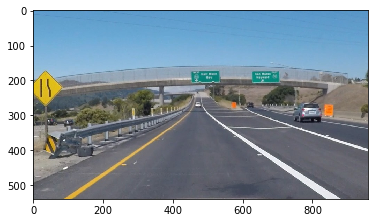

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('exit-ramp.jpg')
plt.imshow(image)
plt.show()

(540, 960, 3)


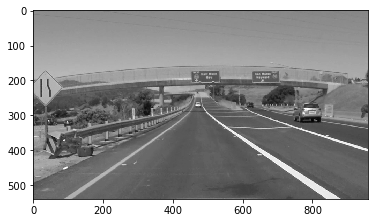

In [2]:
import cv2
import numpy as np

gray_image = np.copy(image)
gray = cv2.cvtColor(gray_image, cv2.COLOR_RGB2GRAY)
print(gray_image.shape)
plt.imshow(gray, cmap='gray')
plt.show()

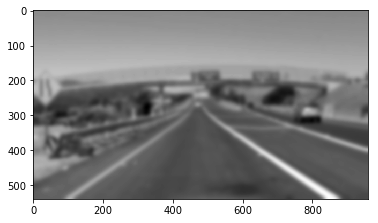

In [3]:
# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 35
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

plt.imshow(blur_gray, cmap='gray')
plt.show()

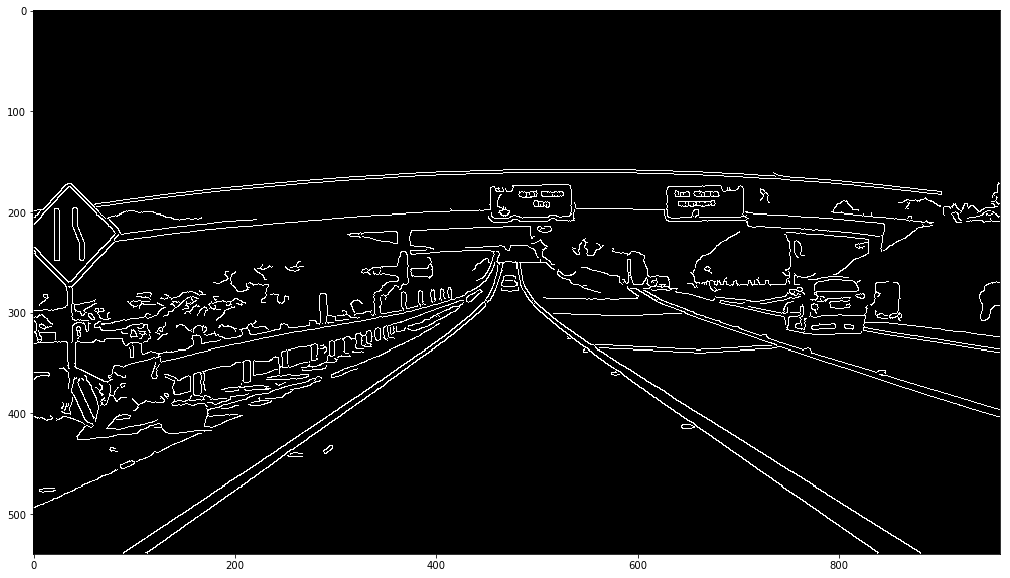

In [4]:
low_threshold = 50
high_threshold = 150

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

plt.rcParams["figure.figsize"] = [18, 10]
plt.imshow(edges, cmap='Greys_r')

plt.show()

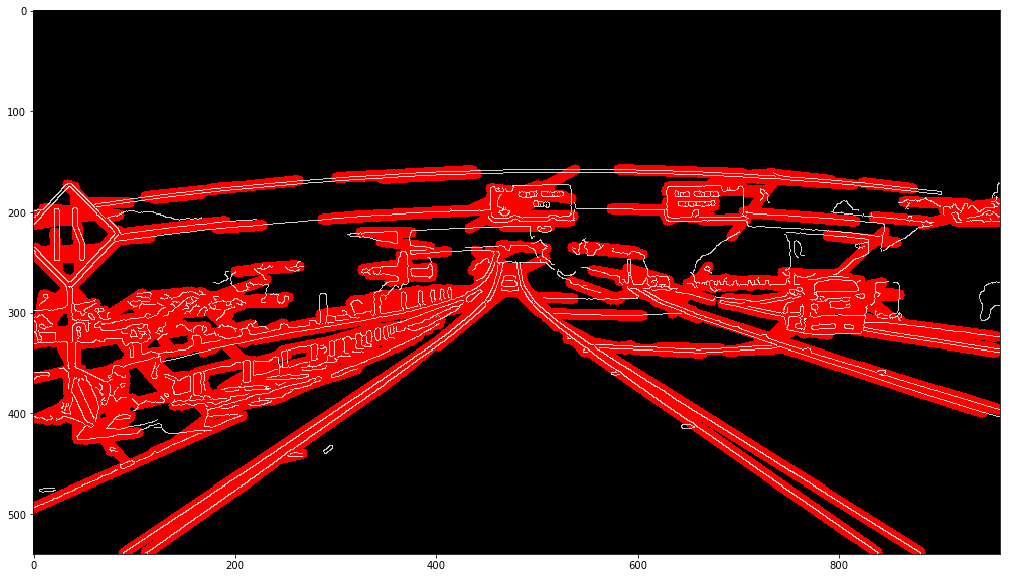

In [16]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 #1
theta = np.pi / 180
threshold = 15 #1
min_line_length = 40 #10
max_line_gap = 20 #1
line_image = np.copy(image) * 0 #creating a blank to draw lines on

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
        
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 
# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)
plt.show()

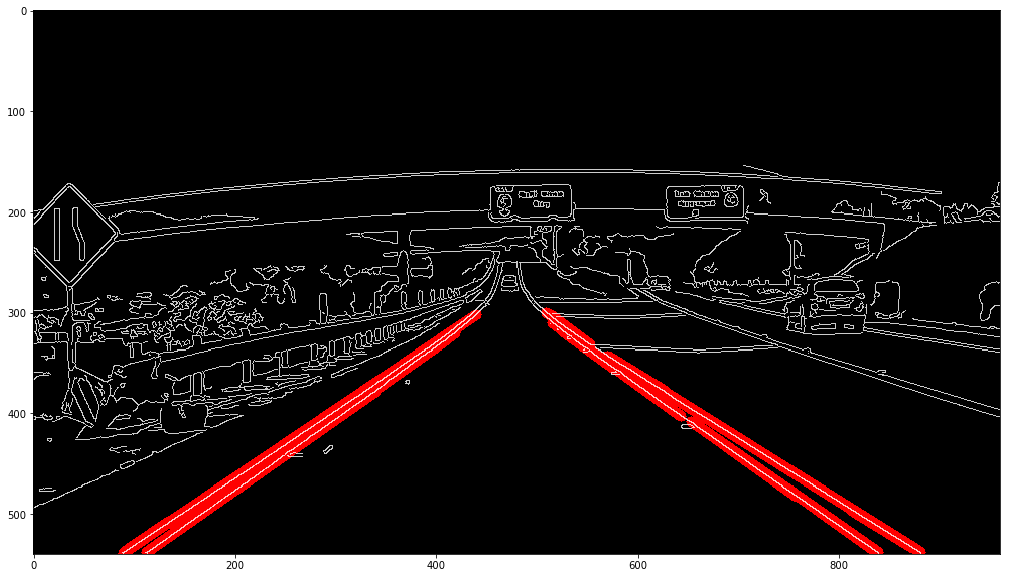

In [33]:
# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0, imshape[0]), (450, 290), (490, 290), (imshape[1], imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15       # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 20    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)
plt.show()
